## Prueba #0503

### "Aumento de datos"

#### Responda las siguientes preguntas proporcionando código Python:
#### Objetivos:
- Codifique las funciones de ayuda.
- Optimice y pruebe un modelo predictivo de su elección.
- Realice aumentos de datos para mejorar la precisión predictiva cuando los datos de entrenamiento proporcionados son pequeños.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Desactivar las advertencias
%matplotlib inline

#### Leer los datos:
La explicación de los datos originales se puede encontrar [aquí](http://yann.lecun.com/exdb/mnist/).
- Los datos que usaremos son un pequeño subconjunto de los datos originales con solo 100 observaciones.
- Cada observación es la versión "aplanada" de una imagen.
- La primera columna corresponde a la etiqueta (Y).
- El tamaño de la imagen es 28x28.

In [2]:
# Ir al directorio dónde se ecuentra el fichero 
os.chdir(r'./Data')                # Reemplazar por la ruta adecuada

In [3]:
# Lea los datos de entrenamiento y prueba por separado.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Escale y divida el conjunto de datos en X e Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). Codifique la función auxiliar 'show_data ()' que visualiza cada observación dada. SUGERENCIA: use matplotlib.pyplot.imshow () y scipy.ndimage.interpolation ().

In [5]:
def show_data(X, Y, n, angle=0):
        print("El numero seleccionado es un:", Y[n]) #Para que se vea mejor el aviso
        image = X[n] #Obtenemos la posicion dada en nuestra X
        image = image.reshape((28, 28)) #Establecemos el tamaño de la imagen
        image = rotate(image, angle, reshape=False) #Rotamos la imagen los ángulos dados
        plt.figure()
        plt.imshow(image, cmap=plt.get_cmap('gray_r')) #Gray_r hace el reverse, para que este el número en negro
        plt.show() #Mostramos la imagen
        

El numero seleccionado es un: 3


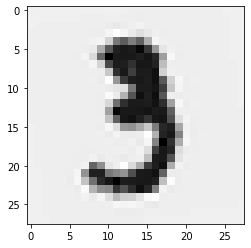

In [6]:
# Ejemplo 1.
show_data(X_train, Y_train,10,+10)

El numero seleccionado es un: 3


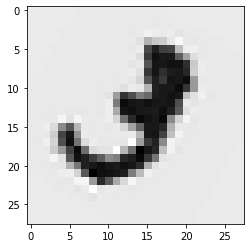

In [7]:
# Ejemplo 2.
show_data(X_train, Y_train,10,-30)

El numero seleccionado es un: 1


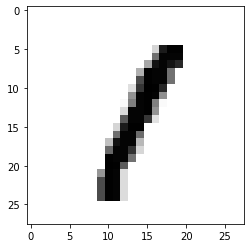

In [8]:
# Ejemplo 3.
show_data(X_train, Y_train,77,0)

2). Elija un algoritmo y realice el análisis predictivo.
- Optimizar los hiperparámetros.
- Calcule la precisión.
- ¿Es la precisión lo suficientemente alta?

Tenemos un dataset etiquetado, esto lo convierte automaticamente en supervised learning, ahora debemos elejir entre los modelos de clasificación que conocemos. 

Digamos que todos los números tienen carácteristicas en común, aunque puedan existir diferencias, por ello vamos a probar kNN.

### KNN

Pseudocódigo para KNN
1. Cargar los datos
2. Inicializar el valor de k
3. Para obtener la clase predicha, repita desde 1 hasta el número total de puntos de datos de entrenamiento
4. Calcule la distancia entre los datos de prueba y cada fila de datos de entrenamiento. Aquí usaremos la distancia euclidiana como nuestra métrica de distancia, ya que es el método más popular.
5. Ordene las distancias calculadas en orden ascendente según los valores de distancia
6. Obtenga las primeras k filas de la matriz ordenada
7. Obtenga la clase más frecuente de estas filas
8. Devuelve la clase predicha 

Error minimo:- 0.32 at K = 7
Máximo acierto:- 0.68 at K = 7


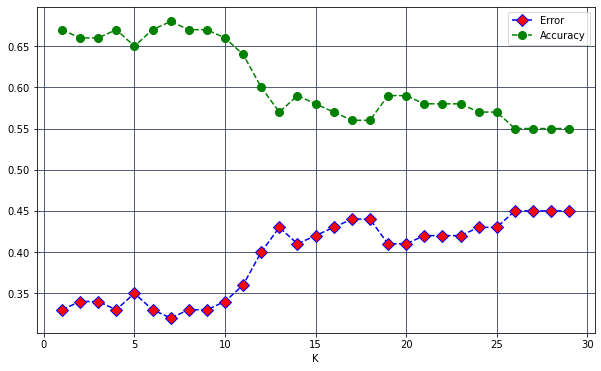

In [38]:
#Inicializamos las variables
error_rate = []
accuracy = []

#Este for se encarga de obtener el error
for i in range(1,30,1):
    knn = KNeighborsClassifier(n_neighbors=i)#Ponemos los vecinos segun el for
    knn.fit(X_train,Y_train) #Pasamos los datos
    predict_i = knn.predict(X_test) #Realizamos la predición
    error_rate.append(np.mean(predict_i != Y_test)) #Añadimos el resultado

#Este for se encarga de obtener el accuracy
from sklearn import metrics
for i in range(1,30,1):
    knn = KNeighborsClassifier(n_neighbors = i)#Ponemos los vecinos segun el for
    knn.fit(X_train,Y_train)#Pasamos los datos
    predict_i = knn.predict(X_test)#Realizamos la predición
    accuracy.append(metrics.accuracy_score(Y_test, predict_i))#Añadimos el resultado

plt.figure(figsize=(10,6)) #Damos tamaño a la figura
plt.plot(range(1,30),error_rate,color='blue', linestyle='dashed', 
         marker='D',markerfacecolor='red', markersize=8, label='Error') #Mostramos el error
plt.plot(range(1,30),accuracy,color = 'green',linestyle='dashed', 
         marker='o', markersize=8, label='Accuracy') #Mostramos el accuracy
plt.xlabel('K')
plt.legend()
plt.grid(color='#2A3459')
#Se suma uno ya que index empieza en 0
print("Error minimo:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1) 
print("Máximo acierto:-",max(accuracy),"at K =",accuracy.index(max(accuracy))+1)

Podemos comprobar que el valor optimo para este dataset es k = 7

In [40]:
from sklearn.metrics import classification_report
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,Y_train)
predictions = model.predict(X_test)

print(classification_report(Y_test,predictions))


              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.50      1.00      0.67        14
           2       1.00      0.12      0.22         8
           3       0.75      0.82      0.78        11
           4       0.80      0.86      0.83        14
           5       0.00      0.00      0.00         7
           6       0.75      0.60      0.67        10
           7       0.85      0.73      0.79        15
           8       0.50      0.50      0.50         2
           9       0.50      0.55      0.52        11

    accuracy                           0.68       100
   macro avg       0.65      0.62      0.59       100
weighted avg       0.68      0.68      0.64       100



3). Codifique la función auxiliar 'rotate_data ()' que rota cada observación dada en un ángulo. SUGERENCIA: use scipy.ndimage.interpolation ().

In [5]:
import random
def rotate_data(X,Y, observacion): #Ponemos la Y para pasar la label
    angle = random.randint(1,356)
    image = X[observacion] #Obtenemos la posicion dada en nuestra X
    label = Y[observacion]
    image = image.reshape((28, 28)) #Establecemos el tamaño de la imagen
    image = rotate(image, angle, reshape=False) #Rotamos la imagen los ángulos dados
    return image, label

4). Aumente el conjunto de datos de entrenamiento.
- Aumente el tamaño del conjunto de datos de entrenamiento al introducir ligeras rotaciones (en sentido horario y antihorario).
- Utilice la función 'rotate_data ()' definida en el paso anterior.
- No es necesario aumentar el conjunto de datos de prueba.
- Objetivo aproximadamente cinco veces mayor.

In [6]:
prueba, label = rotate_data(X_train,Y_train, 2)
X_aumented = prueba.flatten()
X_aumented = np.expand_dims(X_aumented, -1)


In [7]:
for i in range(1,100):
    prueba, label = rotate_data(X_train,Y_train, i) #Obtenemos tanto los datos como la label
    X_aumented = prueba.flatten()
    X_aumented = np.expand_dims(X_aumented, -1)
    X_train = np.concatenate(X_train, np.array(X_aumented.T))
    Y_train = np.append(Y_train, np.array(label))
print(X_train.shape)

TypeError: only integer scalar arrays can be converted to a scalar index

5). Rehaga el análisis predictivo con el conjunto de datos de entrenamiento aumentado.
- Utilice el mismo algoritmo que en el paso 2).
- Calcule la precisión.
- ¿Ha aumentado la precisión?

In [1]:
       # <Tu código va aquí>